In [414]:
import numpy as np
import pandas as pd

In [415]:
df=pd.read_csv('Arrest_Data_from_2010_to_Present.csv')

In [416]:
df.shape

(1227521, 17)

In [417]:
df.columns

Index(['Report ID', 'Arrest Date', 'Time', 'Area ID', 'Area Name',
       'Reporting District', 'Age', 'Sex Code', 'Descent Code',
       'Charge Group Code', 'Charge Group Description', 'Arrest Type Code',
       'Charge', 'Charge Description', 'Address', 'Cross Street', 'Location'],
      dtype='object')

In [418]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227521 entries, 0 to 1227520
Data columns (total 17 columns):
Report ID                   1227521 non-null object
Arrest Date                 1227517 non-null object
Time                        1227322 non-null float64
Area ID                     1227517 non-null float64
Area Name                   1227517 non-null object
Reporting District          1227517 non-null float64
Age                         1227517 non-null float64
Sex Code                    1227517 non-null object
Descent Code                1227517 non-null object
Charge Group Code           1139951 non-null float64
Charge Group Description    1139515 non-null object
Arrest Type Code            1227516 non-null object
Charge                      1227516 non-null object
Charge Description          1139987 non-null object
Address                     1227516 non-null object
Cross Street                707334 non-null object
Location                    1227516 non-null object

In [419]:
# drop all empty rows
df=df.dropna(how='all')

In [420]:
df['Arrest Date']= df['Arrest Date'].fillna(df['Arrest Date'].min)
df['Area Name']= df['Area Name'].fillna(df['Area Name'].min)
df['Reporting District']= df['Reporting District'].fillna(df['Reporting District'].min)
df['Charge Group Description']= df['Charge Group Description'].dropna()
df['Time']= df['Time'].interpolate()
df = df.dropna()
df['Charge Group Description'].isnull().sum()

0

In [421]:
df.isnull().sum()

Report ID                   0
Arrest Date                 0
Time                        0
Area ID                     0
Area Name                   0
Reporting District          0
Age                         0
Sex Code                    0
Descent Code                0
Charge Group Code           0
Charge Group Description    0
Arrest Type Code            0
Charge                      0
Charge Description          0
Address                     0
Cross Street                0
Location                    0
dtype: int64

In [422]:
# select row based on method
# rgx = r''
# df_drop = df.loc[df['Report ID'].str.contains(rgx, na=False, regex=True, case=False)]
# df = df[~df_drop]
# df.drop(df[df['Age'] < 25].index, inplace = True) 
# drop method

# df.drop(df[df['Report ID'].str.contains(rgx, na=False, regex=True, case=False)].index, inplace = True) 
# df.drop(df[df['Report ID'].isin(['  "status" : 500','  "error" : true','  "message" : "Internal error"', '}'])].index, inplace = True) 

In [423]:
df['Report ID'] = df['Report ID'].astype(str).astype(int)

In [424]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651555 entries, 0 to 1227515
Data columns (total 17 columns):
Report ID                   651555 non-null int32
Arrest Date                 651555 non-null object
Time                        651555 non-null float64
Area ID                     651555 non-null float64
Area Name                   651555 non-null object
Reporting District          651555 non-null object
Age                         651555 non-null float64
Sex Code                    651555 non-null object
Descent Code                651555 non-null object
Charge Group Code           651555 non-null float64
Charge Group Description    651555 non-null object
Arrest Type Code            651555 non-null object
Charge                      651555 non-null object
Charge Description          651555 non-null object
Address                     651555 non-null object
Cross Street                651555 non-null object
Location                    651555 non-null object
dtypes: float64(4)

In [425]:
# convert date
df['Arrest Date'] = pd.to_datetime(df['Arrest Date'])
# df['Arrest Date'] = df['Arrest Date'].dt.strftime('%m.%d.%Y')

In [426]:
# let fill the nan in string columns to ''
# df['Charge Description'].fillna('', inplace=True)
# df['Cross Street'].fillna('', inplace=True)
# df['Charge Group Description'].fillna('', inplace=True)
# df['Cross Street'].fillna('', inplace=True)
# df['Time'].fillna(0.0, inplace=True)

In [427]:
df.columns

Index(['Report ID', 'Arrest Date', 'Time', 'Area ID', 'Area Name',
       'Reporting District', 'Age', 'Sex Code', 'Descent Code',
       'Charge Group Code', 'Charge Group Description', 'Arrest Type Code',
       'Charge', 'Charge Description', 'Address', 'Cross Street', 'Location'],
      dtype='object')

In [428]:
# Let start answering question

In [429]:
# Question 1: How many booking of arrestees were made in 2018

In [430]:
Arrestes_in_2018 = df.loc[df['Arrest Date'].dt.year == 2018]
print("Number of Arresstes in 2018 is:", Arrestes_in_2018.shape[0])

Number of Arresstes in 2018 is: 18442


In [431]:
Arrestes_in_2018['Area Name'].unique()

array(['Hollywood', 'Wilshire', 'Southeast', 'Newton', 'Central',
       '77th Street', 'West LA', 'Olympic', 'Southwest', 'West Valley',
       'Mission', 'Hollenbeck', 'Northeast', 'Rampart', 'Harbor',
       'Foothill', 'N Hollywood', 'Pacific', 'Devonshire', 'Topanga',
       'Van Nuys'], dtype=object)

In [432]:
#Question 2: HOw many bookings of arrestees were made in the area with most 2018
# method2- Arrestes_in_2018.groupby('Area Name')['Report ID'].count().reset_index().sort_values('Report ID',ascending=False).head(10)
highest_Arrestees = Arrestes_in_2018.groupby('Area Name')['Report ID'].nunique()
print("Highest 2018 Arrestes in Central Area: ", max(highest_Arrestees))

Highest 2018 Arrestes in Central Area:  3980


In [433]:
# Question 3: find average age of arrestees for each per each charge group
Arrestes_in_2018.groupby('Charge Group Description')['Age'].mean().reset_index().sort_values('Age',ascending=False).drop(index=[19,17])

,Charge Group Description,Age
21,Rape,45.875000
6,Drunkeness,45.088521
13,Liquor Laws,43.947410
10,Gambling,42.413793
3,Disorderly Conduct,42.209902
4,Disturbing the Peace,41.500000
14,Miscellaneous Other Violations,39.368338
16,Narcotic Drug Laws,36.690933
9,Fraud/Embezzlement,35.138889
24,Sex (except rape/prst),35.124294


In [434]:
#Question 3- Method2 
# averages = []
# for i in Arrestes_in_2018['Charge Group Description'].unique():
#     if i == 'Non-Criminal Detention' or i == 'Pre-Delinquency':
#         pass
#     else:
#         selected_One = Arrestes_in_2018['Age'].loc[Arrestes_in_2018['Charge Group Description'] == i]
#         averages.append({i: selected_One.loc[selected_One.notnull()].mean()})

# averages
    

In [435]:
# Question 4 What is the 95% quantile of the age of the arrestee in 2018? 
# Only consider the following charge groups for your analysis
columns = ['Vehicle Theft', 'Robbery', 'Burglary', 'Receive Stolen Property']
Quantile_Age = Arrestes_in_2018['Age'].loc[Arrestes_in_2018['Charge Group Description'].isin(columns)].quantile(.95)
print("Quantile of Age :", Quantile_Age)

Quantile of Age : 49.14999999999998


In [436]:
# Q5. Felony arrest incidents have been dropping over the years. Using a trend line (linear estimation) for the data 
# from 2010 and 2018 (inclusive), what is the projected number of felony 
# arrests in 2019? Round to the nearest integer. Note, the data set includes arrests for misdemeanor, felonies, etc

In [437]:
df['Charge'].str.contains('felony').sum()

0

In [440]:
# murder, rape, burglary, kidnapping and arson
df['year'] = df['Arrest Date'].dt.year
data_2010to2018=df[(df['year'] >=2010) & (df['year'] <=2018) ]


In [441]:
i = data_2010to2018[(data_2010to2018['Charge Group Description'] == 'Larceny')].index
data_2010to2018.drop(i,inplace =True)
i = data_2010to2018[(data_2010to2018['Charge Group Description'] == 'Other Assaults')].index
data_2010to2018.drop(i,inplace =True)
i = data_2010to2018[(data_2010to2018['Charge Group Description'] == 'Receive Stolen Property')].index
data_2010to2018.drop(i,inplace =True)
i = data_2010to2018[(data_2010to2018['Charge Group Description'] == 'Driving Under Influence')].index
data_2010to2018.drop(i,inplace =True)
i = data_2010to2018[(data_2010to2018['Charge Group Description'] == 'Prostitution/Allied')].index
data_2010to2018.drop(i,inplace =True)
i = data_2010to2018[(data_2010to2018['Charge Group Description'] == 'Moving Traffic Violations')].index
data_2010to2018.drop(i,inplace =True)
i = data_2010to2018[(data_2010to2018['Charge Group Description'] == 'Liquor Laws')].index
data_2010to2018.drop(i,inplace =True)
i = data_2010to2018[(data_2010to2018['Charge Group Description'] == 'Drunkeness')].index
data_2010to2018.drop(i,inplace =True)
i = data_2010to2018[(data_2010to2018['Charge Group Description'] == 'Disturbing the Peace')].index
data_2010to2018.drop(i,inplace =True)
i = data_2010to2018[(data_2010to2018['Charge Group Description'] == 'Gambling')].index
data_2010to2018.drop(i,inplace =True)

In [442]:
felony_dataset=data_2010to2018.copy()
felony_dataset=felony_dataset[['year','Charge Group Description']]
felony_dataset

,year,Charge Group Description
0,2015,Burglary
6,2015,Burglary
7,2015,Robbery
165,2018,Fraud/Embezzlement
166,2018,Homicide
...,...,...
1227505,2018,Miscellaneous Other Violations
1227507,2018,Sex (except rape/prst)
1227508,2018,Miscellaneous Other Violations
1227510,2018,Aggravated Assault


In [443]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from pandas.plotting import autocorrelation_plot
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

In [444]:
lb= LabelEncoder()

In [445]:
felony_dataset['Charge Group Description'] = lb.fit_transform(felony_dataset['Charge Group Description'])
gkk= felony_dataset.groupby('year')['Charge Group Description'].sum().reset_index().sort_values('year',ascending=False)
gkk

,year,Charge Group Description
8,2018,73358
7,2017,260854
6,2016,260476
5,2015,268183
4,2014,309417
3,2013,346673
2,2012,372749
1,2011,405383
0,2010,423694


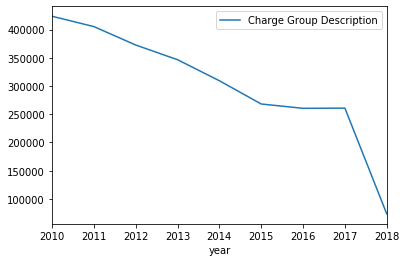

In [446]:
gkk.plot(x = "year", y = "Charge Group Description")

In [447]:
# model.score(gkk[['year']],gkk['Charge Group Description'])
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=10,learning_rate=1)
model.fit(gkk[['year']],gkk['Charge Group Description'])

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=10,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [448]:
model.score(gkk[['year']],gkk['Charge Group Description'])

1.0

In [449]:
# The projected number of felony arrests in 2019
arr= np.array([2019])
y_pred= model.predict([arr])
y_pred

array([73358.])

In [450]:
# LinearRegression
lr= LinearRegression()
lr.fit(gkk[['year']],gkk['Charge Group Description'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [451]:
lr.score(gkk[['year']],gkk['Charge Group Description'])

0.8522330154058445

In [452]:
lr.coef_

array([-35632.78333333])

In [453]:
lr.intercept_

72066735.30000001

In [454]:
# The projected number of felony arrests in 2019

arr= np.array([2019])
y_pred= lr.predict([arr])
y_pred

array([124145.75])

In [455]:
# Predicitions using Time Series (Learning Purpose)
gkks=gkk.copy()
gkks['year']=pd.to_datetime(gkks['year'])
gkks.set_index('year',inplace=True)

In [456]:
X = gkks.values
X

array([[ 73358],
       [260854],
       [260476],
       [268183],
       [309417],
       [346673],
       [372749],
       [405383],
       [423694]])

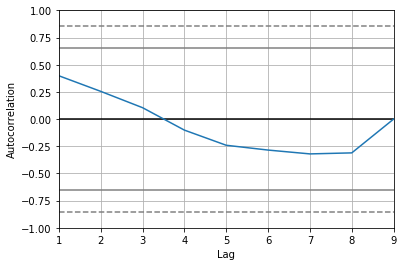

In [457]:
autocorrelation_plot(X)

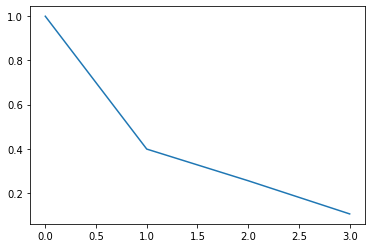

In [458]:
from statsmodels.tsa.stattools import acf,pacf
autor=acf(X,nlags=3)
par=pacf(X,nlags=3,method='ols')
pyplot.plot(autor,label='std')

In [459]:
import statsmodels.api as sms
model = sms.tsa.statespace.SARIMAX(X,order=(1,0,0))
result = model.fit()
print(result.summary())

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                    9
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -114.763
Date:                Tue, 06 Oct 2020   AIC                            233.526
Time:                        23:30:50   BIC                            233.921
Sample:                             0   HQIC                           232.675
                                  - 9                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9763      0.047     20.584      0.000       0.883       1.069
sigma2      4.285e+09   3.95e-13   1.08e+22      0.000    4.28e+09    4.28e+09
Ljung-Box (Q):                         nan   Jarque-

In [460]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random

model = SARIMAX(X, order=(1, 3, 2))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(X), len(X)+1)
print(yhat)

ValueError: maxlag should be < nobs

In [465]:
# Question 6: How many arrest incidents occurred within 2 km from the Bradbury
# Building in 2018? Use (34.050536, -118.247861) for the coordinates of the Bradbury Building . 
# For simplicity, please use the spherical Earth projected to a plane equation for calculating distances. 
# Use the radius of the Earth as 6371 km. Note, some arrest records are missing location data and the location is listed 
# as (0, 0). These records should not factor in your calculation.

In [466]:
from math import sin,cos,sqrt,atan2,radians

In [467]:
def calculate_distance(coord):
    R=6371.0
    lat1=radians(34.050536)
    lon1=radians(-118.247861)
    lat2=radians(coord[0])
    lon2=radians(coord[1])
    dlon=lon2-lon1
    dlat=lat2-lat1
    
    a= sin(dlat/2)**2+ cos(lat1)+cos(lat2)+sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(a-1))

    distance = R*c
    return distance

In [468]:
calculate_distance

<function __main__.calculate_distance(coord)>

In [469]:
Arrestes_in_2018["distance_Bradbury"]=Arrestes_in_2018[(Arrestes_in_2018['Location']!="(0,0)")&(pd.notna(df['Location']))]['Location'].apply(lambda x: calculate_distance([float(y) for y in x[1:-1].split(",")]))
Arrestes_in_2018["distance_Bradbury"]

165        12855.513810
166        12854.544734
171        12851.457631
177        12853.812284
178        12854.139666
               ...     
1227507    12853.781433
1227508    12855.592781
1227510    12852.846104
1227511    12859.776084
1227515    12853.621412
Name: distance_Bradbury, Length: 18442, dtype: float64